# AI project team 16
This file use Deep Complex Networks (DCN) to classify American Sign Language pictures.

Dataset: Sign Language MNIST

# Data loading and pre-processing

In [26]:
# import things
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from google.colab import drive

In [27]:
# if dataset is on google drive
# --basePath
#  |-sign_mnist_test.csv
#  |-sign_mnist_train.csv
# drive.mount('/content/drive')
# basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/Sign Language MNIST/"


In [28]:
# otherwise, if dataset is uploaded to the runtime
basePath=''

In [29]:
# read file
train = pd.read_csv(basePath + "sign_mnist_train.csv")
test = pd.read_csv(basePath + "sign_mnist_test.csv")
# print(train.head())
# print(test.head())

In [30]:
# generate pictures stored path
if not os.path.exists(basePath + "train_pic"):
    os.mkdir(basePath + "train_pic")
if not os.path.exists(basePath + "test_pic"):
    os.mkdir(basePath + "test_pic")

train_pic_path = basePath + "train_pic/"
test_pic_path = basePath + "test_pic/"

# generate pictures
for i, row in enumerate(train.to_numpy()):
    label = row[0]
    data = row[1:]
    data = data.reshape((28,28))
    if not os.path.exists(f'{train_pic_path}{label}'):
        os.mkdir(f'{train_pic_path}{label}')
    if not os.path.exists(f'{train_pic_path}{label}/{i}.jpeg'):
        cv2.imwrite(f'{train_pic_path}{label}/{i}.jpeg', data)
    
for i, row in enumerate(test.to_numpy()):
    label = row[0]
    data = row[1:]
    data = data.reshape((28,28))
    if not os.path.exists(f'{test_pic_path}{label}'):
        os.mkdir(f'{test_pic_path}{label}')
    if not os.path.exists(f'{test_pic_path}{label}/{i}.jpeg'):
        cv2.imwrite(f'{test_pic_path}{label}/{i}.jpeg', data)
    

## Pre-processing

process label and show some pictures

In [31]:
# preprocess data
y_train = train['label'].values
X_train = train.drop(columns = ['label']).to_numpy().reshape((train.shape[0], 28, 28,1)).astype('float64')/255.0

y_test = test['label'].values
X_test = test.drop(columns = ['label']).to_numpy().reshape((test.shape[0], 28,28,1)).astype('float64')/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
print(X_test.shape)

(7172, 28, 28, 1)


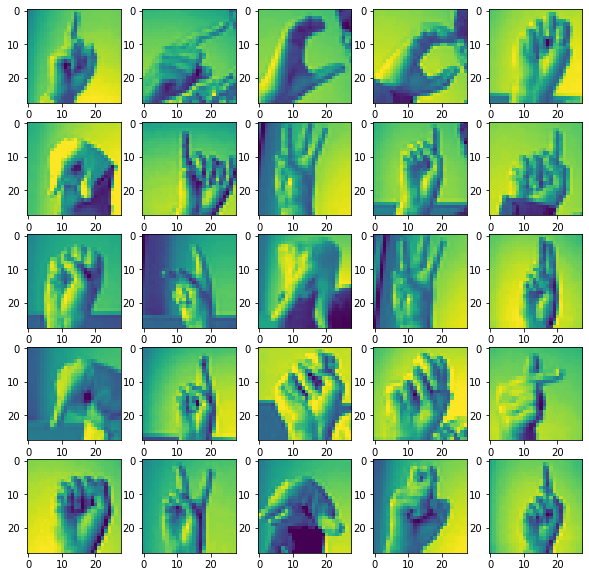

In [33]:
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize = (10,10))
i = 0
j = 0
for n in range(25):
    data = train.iloc[n][1:].to_numpy()
    data = data.reshape((28,28))
    axes[i, j].imshow(data)
    j += 1
    if j%5 == 0:
        i += 1
        j = 0
        
plt.show()

## Construct training and testing set

In [34]:
# define image loader
datagen = ImageDataGenerator(
      rescale = 1/255.0,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      validation_split=0.25)

# generate train set
train_generator = datagen.flow_from_directory(
    train_pic_path,
    class_mode = 'categorical',
    batch_size = 20,
    target_size = (28,28))

# generate test set
test_generator = datagen.flow_from_directory(
    test_pic_path,
    class_mode = 'categorical',
    batch_size = 20,
    target_size = (28,28))

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


# CNN model

In [35]:
# define the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', input_shape = (28,28,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation = 'softmax')]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)        

## Model training

In [36]:
ep=30
lr=0.0001

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
his = model.fit(train_generator, epochs = ep, validation_data = test_generator)


Epoch 1/30
1373/1373 [==============================] - 44s 32ms/step - loss: 2.8521 - accuracy: 0.1542 - val_loss: 2.5599 - val_accuracy: 0.2016
Epoch 2/30
1373/1373 [==============================] - 48s 35ms/step - loss: 2.2500 - accuracy: 0.2932 - val_loss: 1.9206 - val_accuracy: 0.3671
Epoch 3/30
1373/1373 [==============================] - 43s 31ms/step - loss: 1.9036 - accuracy: 0.3859 - val_loss: 1.6958 - val_accuracy: 0.4518
Epoch 4/30
1373/1373 [==============================] - 43s 31ms/step - loss: 1.6476 - accuracy: 0.4616 - val_loss: 1.4249 - val_accuracy: 0.5160
Epoch 5/30
1373/1373 [==============================] - 43s 31ms/step - loss: 1.4249 - accuracy: 0.5283 - val_loss: 1.3171 - val_accuracy: 0.5443
Epoch 6/30
1373/1373 [==============================] - 43s 31ms/step - loss: 1.2485 - accuracy: 0.5830 - val_loss: 1.4166 - val_accuracy: 0.5485
Epoch 7/30
1373/1373 [==============================] - 44s 32ms/step - loss: 1.1126 - accuracy: 0.6264 - val_loss: 1.0526 -

## Classification results

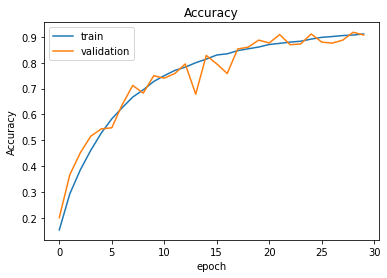

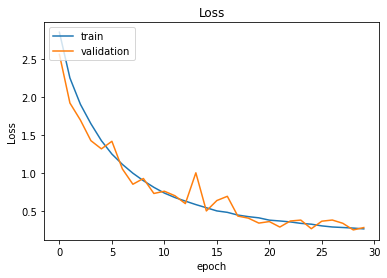

In [37]:
def plot_model_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


plot_model_history(his)

In [40]:
loss, acc, = model.evaluate(test_generator)
print("the prediction loss is", loss)
print('the prediction accuracy is', acc)

359/359 [==============================] - 9s 24ms/step - loss: 0.2753 - accuracy: 0.9050
the prediction loss is 0.27525460720062256
the prediction accuracy is 0.9050474166870117
